# Normality Test

**¿Cuándo es apropiado utilizar la prueba de Kolmogorov-Smirnov en lugar de la prueba de Shapiro-Wilk?**

- La prueba de K-S es más general: puede usarse para comparar una muestra con cualquier distribución teórica continua (normal, exponencial, uniforme, etc.).
- Se utiliza Kolmogorov-Smirnov en lugar de Shapiro-Wilk cuando se prueba una distribución distinta a la normal, o cuando la muestra es muy grande.
- Para normalidad en muestras típicas, Shapiro-Wilk es superior.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def import_csv(file):
    return pd.read_csv(file)

path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

data = import_csv(path)

In [3]:
# Lista de columnas a probar
columnas = ['dic_micromol_kg', 'sal_psu']

# Realizar la prueba de Shapiro-Wilk para cada columna
for col in columnas:
    # Eliminar valores nulos (necesario para la prueba)
    datos = data[col].dropna()
    
    # Verificar que haya suficientes datos (Shapiro-Wilk requiere al menos 3 y máximo ~5000)
    if len(datos) < 3:
        print(f"[{col}]: Muestra muy pequeña ({len(datos)} observaciones), no se puede aplicar Shapiro-Wilk.\n")
        continue
    elif len(datos) > 5000:
        print(f"[{col}]: Muestra grande ({len(datos)} observaciones). Shapiro-Wilk puede no ser óptimo, pero se intentará.\n")
    
    # Aplicar la prueba de Shapiro-Wilk
    stat, p_value = shapiro(datos)
    
    # Interpretar los resultados
    alpha = 0.05  # nivel de significancia
    if p_value > alpha:
        resultado = "no se rechaza H₀ → los datos podrían ser normales"
    else:
        resultado = "se rechaza H₀ → los datos NO siguen una distribución normal"
    
    # Mostrar resultados
    print(f"Prueba de Shapiro-Wilk para '{col}':")
    print(f"  Estadístico W = {stat:.4f}")
    print(f"  Valor p = {p_value:.4f}")
    print(f"  Conclusión: {resultado}\n")

Prueba de Shapiro-Wilk para 'dic_micromol_kg':
  Estadístico W = 0.8600
  Valor p = 0.0000
  Conclusión: se rechaza H₀ → los datos NO siguen una distribución normal

Prueba de Shapiro-Wilk para 'sal_psu':
  Estadístico W = 0.8867
  Valor p = 0.0000
  Conclusión: se rechaza H₀ → los datos NO siguen una distribución normal



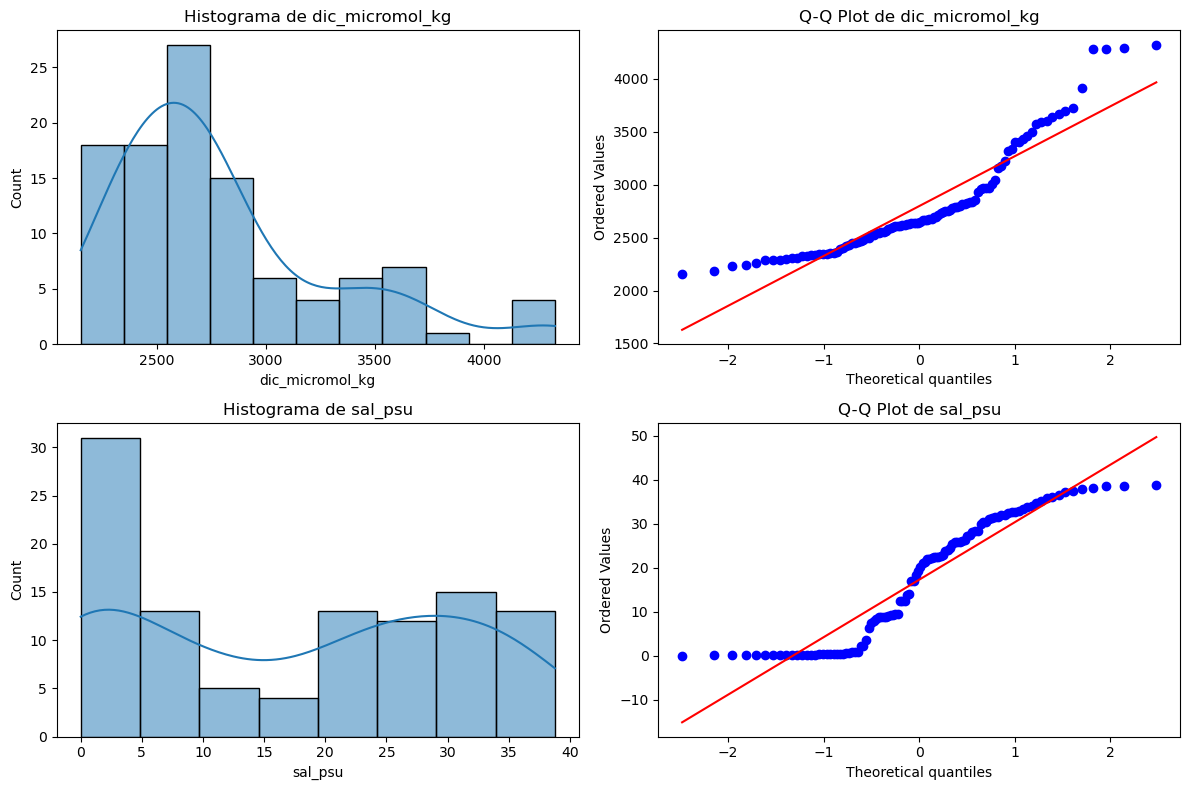

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columnas):
    datos = data[col].dropna()
    
    # Histograma
    sns.histplot(datos, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {col}')
    
    # Q-Q plot
    from scipy.stats import probplot
    probplot(datos, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot de {col}')

plt.tight_layout()
plt.show()